In [1]:
import numpy as np
import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

The iterative solution is, in fact, given by 
$$
v^{(n+1)}=P^{T} v^{(n)} \; ,
$$
with $P$ is the transition matrix ($P^{T}v$ gives a "probabilistic state", which its entries are the probabilities of moving to its descrete state) $v^{(n+1)}$ the state after $n+1$ transformations of the initial state $v^{(0)}$.
That is, we have a sequence of $v$'s given by:

\begin{align}
v^{(0)} & \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;  0 \;\text{(initial state)}
\\
v^{(1)}=&P^{T}v^{(0)}  \;\;\;\;\;\;\; 1
\\
v^{(2)}=&P^{T}v^{(1)}  \;\;\;\;\;\;\; 2
\\
\vdots
\\
v^{(n)}=&P^{T} v^{(n-1)} \;\;\;\;\; n \;.
\end{align}

The idea is that as $v^{(\infty)}=v^{(n\to \infty)}$, tends to a constant.  
This constant vector is the equilibrium vector, i.e. the probability to 
find the system in a given state.

For example, if the equilibrium vector is $W=(0.1,0.4,0.5)$, then there is $10\%$ probability 
to find the system in state $1$, $40\%$ in state $2$, and $50\%$ in state $3$.

In [2]:
'''
Generate a random Markov Chain (with N_dim #states) and see if it reaches equilibrium (the most probable scenario is that it will, since I generate random rows
with numbers that add up to 1)
''';

N_dim=11
Transition=np.random.dirichlet(np.ones(N_dim),N_dim)
#Number of steps in both the Iteration and (the maximum of) Simulation.
N_tot=100000
#Doing the following you start at state 0 automatically.
len_T=len(Transition[0])
init_s=np.zeros(len_T)
init_s[0]=1

In [3]:
v=init_s[:]
for i in np.arange(N_tot):

    '''
    Iterative solution:
    Calculate v^{(n+1)}=P^{T}v^{(n)}
    '''
    v=np.dot(Transition.T,v)

In [6]:

'''
Simulate the Markov Chain
'''
#state=[1,0,0,0]#This is the initial sate vector, which indicates the current state. e.g [1,0,0] indicates that the system is in state 0 (I start counting from 0).
state=init_s[:]#start at state 0 automatically
#initialize _visits=[0,0,0,0,0,...,0]
_visits=np.zeros(len(state))

tolerance=1e-7
#The variable ac defines how often looks for convergence, and how many positions takes
#in order to get a mean and variance.
ac=500


fN_tot=float(N_tot)
means=[]
tot_means=[]#track all means, and show a trace plot.
print ('Transition \t' , ' Mean position \t', 'Variance ')
for transition in np.arange(1,N_tot+1):
    '''
    Simulation:
    The next state in the simulation is determined by the multinomial distribution,
    which is included in numpy ( you can find how to samlpe from the multinomial in misc/multinomial.py ).

    To determine if the chain has converged, get the mean positions every 'ac' transitions. This will give you
    a list  N_dim*2 means. The chains has convered if the relative variance of the means is below some
    threshold (tolerance variable).
    '''
    state= np.random.multinomial(1,np.dot(Transition.T,state))
    #Fortunately, all notations click together. Since states are defined in "binary",
    #we can add them up to obtain the number of visits for each state.

    _visits+=state
    equilibrium=_visits/float(transition)

    #get the mean position for 'ac' transitions
    if transition%(ac) != 0:
        #mean position. <i>:=\sum_{j} j*P_{j} (ie position of state * probability of being in this state )
        _m=np.sum(  [ e*i for i,e in enumerate(equilibrium)]  )
        means.append( _m )
        tot_means.append(_m)
        
    #after 'ac' transitions, check if it has converged. If not, reset the list of means and continue.
    else:
        _var=np.var(means)
        _mean=np.mean(means)
        if _var/_mean<tolerance:
            s=equilibrium
            print ('converged after: {}  transitions. Equilibrium state:   \n {}'.format(transition, equilibrium) )

            break
            
        
        print( '{0:}\t{3:>9}{1:0.5}\t{3:>9}{2:0.5}'.format(transition , _mean, _var,'') )
        #keep in mind that the variance is not entirely correct, because of autocorrelation.
        
        
        means=[]


Transition 	  Mean position 	 Variance 
500	         4.9738	         0.17079
1000	         4.8985	         0.0014605
1500	         4.8982	         0.00025761
2000	         4.9104	         0.00010217
2500	         4.901	         4.266e-05
3000	         4.8971	         7.761e-05
3500	         4.9217	         1.6881e-05
4000	         4.9124	         7.4703e-05
4500	         4.9136	         1.6791e-05
5000	         4.9006	         1.2585e-05
5500	         4.91	         3.7114e-05
6000	         4.9029	         4.7541e-05
6500	         4.8969	         5.1707e-06
7000	         4.9043	         1.9817e-05
7500	         4.9076	         7.6247e-06
8000	         4.9058	         1.7603e-05
8500	         4.9011	         3.5788e-06
9000	         4.8959	         2.2446e-06
9500	         4.895	         2.0005e-06
10000	         4.8889	         2.2406e-06
10500	         4.8942	         5.9428e-06
11000	         4.8876	         2.0199e-06
11500	         4.8881	         1.8445e-06
12000	         4.8892	  

In [7]:
#The equilibrium one is the same as  the iterative one
print( equilibrium)
print( v)

[0.06688889 0.11195556 0.10128889 0.08124444 0.07426667 0.16702222
 0.10875556 0.07368889 0.04151111 0.05751111 0.11586667]
[0.06538885 0.10982794 0.1019127  0.08147    0.07646939 0.16936698
 0.10765973 0.07454355 0.04050529 0.05750501 0.11535056]


<IPython.core.display.Javascript object>


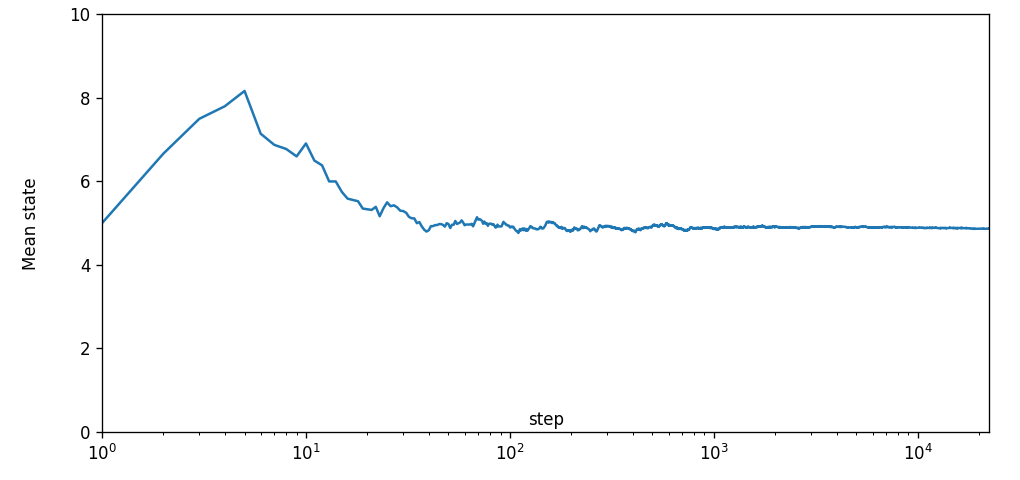

In [8]:
_trace=True #set True to see the plot
if _trace:

    #=================================== Plots ===================================#
    fig=plt.figure(figsize=(8.5,4))
    fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.97, right=0.97)
    #=============================================================================#
    sub = fig.add_subplot(111)
    #===========================================================================================================================================#
   
    _len=len(tot_means)
    sub.plot(np.arange(_len), tot_means )
    
    
    sub.set_xlabel('step')
    sub.set_ylabel('Mean state')
    sub.yaxis.set_label_coords(-0.07, 0.5)
    sub.xaxis.set_label_coords(0.5, 0.05)
    sub.set_xscale('log')
    sub.set_xlim(1,_len)
    sub.set_ylim(0,N_dim-1)
    plt.show()
#===========================================================================================================================================#